In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Training data
app_train = pd.read_csv('application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head(10)

C:\Users\Umesh.k\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Testing data features
app_test = pd.read_csv('application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head(10)

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
8,100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
9,100067,Cash loans,F,Y,Y,1,162000.0,45000.0,5337.0,45000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [3]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [4]:
app_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [5]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [6]:
app_test.dtypes.value_counts()

float64    65
int64      40
object     16
dtype: int64

In [7]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645


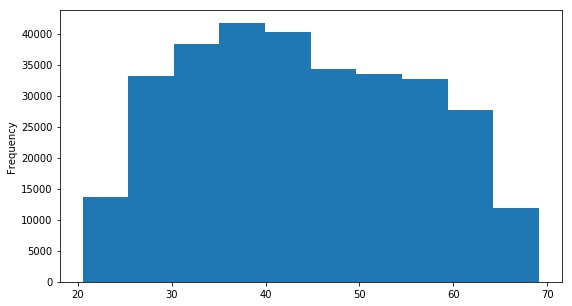

In [8]:
plt.figure(figsize = (9, 5)) 
(app_train['DAYS_BIRTH'] / -365).plot(kind ="hist") 
# (app_train['DAYS_BIRTH'] / 365)

In [9]:
app_train.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [10]:
# Number of unique classes in each object column
app_train.select_dtypes(include=['object']) 
#.apply(pd.Series.nunique, axis = 0)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
5,Cash loans,M,N,Y,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Other,NaN,NaN,NaN,NaN
6,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Accountants,SUNDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
7,Cash loans,M,Y,Y,Unaccompanied,State servant,Higher education,Married,House / apartment,Managers,MONDAY,Other,NaN,NaN,NaN,NaN
8,Cash loans,F,N,Y,Children,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,WEDNESDAY,XNA,NaN,NaN,NaN,NaN
9,Revolving loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,THURSDAY,Electricity,NaN,NaN,NaN,NaN


In [11]:
train_df = app_train.select_dtypes(exclude=['object'])
test_df = app_test.select_dtypes(exclude=['object'])
train_df.select_dtypes(include=['object']) 
train_df.shape , app_train.shape

((307511, 106), (307511, 122))

In [12]:
test_df.shape , app_test.shape

((48744, 105), (48744, 121))

In [13]:
train_df.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL                          0
CNT_FAM_MEMBERS                     2
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
HOUR_APPR_PROCESS_START             0
REG_REGION_NOT_LIVE_REGION          0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT

In [14]:
test_df.isnull().sum()

SK_ID_CURR                         0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       24
AMT_GOODS_PRICE                    0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                    32312
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
L

In [15]:
train_df.median()

SK_ID_CURR                     278202.000000
TARGET                              0.000000
CNT_CHILDREN                        0.000000
AMT_INCOME_TOTAL               147150.000000
AMT_CREDIT                     513531.000000
AMT_ANNUITY                     24903.000000
AMT_GOODS_PRICE                450000.000000
REGION_POPULATION_RELATIVE          0.018850
DAYS_BIRTH                     -15750.000000
DAYS_EMPLOYED                   -1213.000000
DAYS_REGISTRATION               -4504.000000
DAYS_ID_PUBLISH                 -3254.000000
OWN_CAR_AGE                         9.000000
FLAG_MOBIL                          1.000000
FLAG_EMP_PHONE                      1.000000
FLAG_WORK_PHONE                     0.000000
FLAG_CONT_MOBILE                    1.000000
FLAG_PHONE                          0.000000
FLAG_EMAIL                          0.000000
CNT_FAM_MEMBERS                     2.000000
REGION_RATING_CLIENT                2.000000
REGION_RATING_CLIENT_W_CITY         2.000000
HOUR_APPR_

In [16]:
test_df.median()

SK_ID_CURR                     277549.000000
CNT_CHILDREN                        0.000000
AMT_INCOME_TOTAL               157500.000000
AMT_CREDIT                     450000.000000
AMT_ANNUITY                     26199.000000
AMT_GOODS_PRICE                396000.000000
REGION_POPULATION_RELATIVE          0.018850
DAYS_BIRTH                     -15785.000000
DAYS_EMPLOYED                   -1293.000000
DAYS_REGISTRATION               -4490.000000
DAYS_ID_PUBLISH                 -3234.000000
OWN_CAR_AGE                         9.000000
FLAG_MOBIL                          1.000000
FLAG_EMP_PHONE                      1.000000
FLAG_WORK_PHONE                     0.000000
FLAG_CONT_MOBILE                    1.000000
FLAG_PHONE                          0.000000
FLAG_EMAIL                          0.000000
CNT_FAM_MEMBERS                     2.000000
REGION_RATING_CLIENT                2.000000
REGION_RATING_CLIENT_W_CITY         2.000000
HOUR_APPR_PROCESS_START            12.000000
REG_REGION

In [17]:
training_data = train_df.fillna(train_df.median())
testing_data = test_df.fillna(test_df.median())


In [18]:
testing_data.isnull().head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
Id_data = training_data['SK_ID_CURR']  
training_data.isnull().head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
training_data.to_csv("df_train",index=False)

In [54]:
X_train = training_data.drop("TARGET", axis=1)
Y_train = training_data["TARGET"]
X_test  = testing_data.copy()
X_train.shape, Y_train.shape, X_test.shape
X_train.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
Y_train.head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [56]:
X_test.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329,-5170.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469,-9118.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,-4458,-2175.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,-1866,-2000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,1,180000.0,625500.0,32067.0,625500.0,0.010032,-13040,-2191,-4000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [57]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
 
print(Y_pred)
acc_log = round(logreg.score(X_train, Y_train)*100 , 3)
acc_log

[0 0 0 ..., 0 0 0]


91.926000000000002

In [58]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
X_proba = logreg.predict_proba(X_test)
X_proba

array([[ 0.91653602,  0.08346398],
       [ 0.88941253,  0.11058747],
       [ 0.93577608,  0.06422392],
       ..., 
       [ 0.92623683,  0.07376317],
       [ 0.94338381,  0.05661619],
       [ 0.90644985,  0.09355015]])

In [60]:

dataframe1=pd.DataFrame(X_proba)
print(dataframe1.head())
dataframe1 = dataframe1[dataframe1[0]>.5]
print(dataframe1.shape)

          0         1
0  0.916536  0.083464
1  0.889413  0.110587
2  0.935776  0.064224
3  0.970540  0.029460
4  0.919554  0.080446
(48744, 2)


In [83]:
Target = training_data[['SK_ID_CURR', 'TARGET']] 
#Target = Id_data
print(Target.shape)
Target.head()
# Target_data = Target.rename(columns={"0": "Target"})
# print(Target_data.head())

(307511, 2)


,SK_ID_CURR,TARGET
0,100002,1
1,100003,0
2,100004,0
3,100006,0
4,100007,0


In [81]:

bureau_data = pd.read_csv('bureau.csv')
print(bureau_data.shape)
bureau_data.head()
print(bureau_data.loc[bureau_data['SK_ID_CURR'] == 100002])



(1716428, 17)
         SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
675684       100002       6158904        Closed      currency 1        -1125   
675685       100002       6158905        Closed      currency 1         -476   
675686       100002       6158906        Closed      currency 1        -1437   
675687       100002       6158907        Closed      currency 1        -1121   
675688       100002       6158908        Closed      currency 1         -645   
675689       100002       6158909        Active      currency 1         -103   
1337779      100002       6158903        Active      currency 1        -1042   
1486113      100002       6113835        Closed      currency 1        -1043   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
675684                    0              -1038.0            -1038.0   
675685                    0                  NaN              -48.0   
675686                    0              -1072.0    

In [84]:
merge_1=bureau_data.merge(Target, left_on=None)
print(merge_1.head())
merge_1.shape

   SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN         

(1465325, 18)

In [85]:
# Find correlations with the target and sort
correlations1 = merge_1.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations1.tail(15))
print('\nMost Negative Correlations:\n', correlations1.head(15))


Most Positive Correlations:
 AMT_CREDIT_SUM           -0.010606
SK_ID_BUREAU             -0.009018
AMT_CREDIT_SUM_LIMIT     -0.005990
SK_ID_CURR               -0.003024
AMT_ANNUITY               0.000117
CNT_CREDIT_PROLONG        0.001523
AMT_CREDIT_MAX_OVERDUE    0.001587
AMT_CREDIT_SUM_DEBT       0.002539
CREDIT_DAY_OVERDUE        0.002652
AMT_CREDIT_SUM_OVERDUE    0.006253
DAYS_CREDIT_ENDDATE       0.026497
DAYS_ENDDATE_FACT         0.039057
DAYS_CREDIT_UPDATE        0.041076
DAYS_CREDIT               0.061556
TARGET                    1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 AMT_CREDIT_SUM           -0.010606
SK_ID_BUREAU             -0.009018
AMT_CREDIT_SUM_LIMIT     -0.005990
SK_ID_CURR               -0.003024
AMT_ANNUITY               0.000117
CNT_CREDIT_PROLONG        0.001523
AMT_CREDIT_MAX_OVERDUE    0.001587
AMT_CREDIT_SUM_DEBT       0.002539
CREDIT_DAY_OVERDUE        0.002652
AMT_CREDIT_SUM_OVERDUE    0.006253
DAYS_CREDIT_ENDDATE       0.026497
DA

In [96]:
print(merge_1['DAYS_CREDIT'].isnull().sum())
print(merge_1['DAYS_CREDIT'].dtypes)

0
int64


In [64]:
bureau_bal_data = pd.read_csv('bureau_balance.csv')
print(bureau_bal_data.shape)
bureau_bal_data.head()

(27299925, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [66]:
crecard_bal_data =  pd.read_csv('credit_card_balance.csv')
print(crecard_bal_data.shape)
crecard_bal_data.head()

(3840312, 23)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [86]:
merge_3=crecard_bal_data.merge(Target, left_on=None)
print(merge_3.head())
merge_3.shape

   SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2582071      363914              -1    63975.555   
1     2582071      363914             -82    16809.210   
2     2582071      363914             -84    27577.890   
3     2582071      363914              -7    65159.235   
4     2582071      363914             -59    70475.850   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                    45000                    2250.0                2250.0   
1                    67500                       0.0                   0.0   
2                    67500                       0.0                   0.0   
3                    45000                       0.0                   0.0   
4                    67500                   24750.0               24750.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2    

(3227965, 24)

In [87]:
# Find correlations with the target and sort
correlations3 = merge_3.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations3.tail(15))
print('\nMost Negative Correlations:\n', correlations3.head(15))

Most Positive Correlations:
 AMT_PAYMENT_TOTAL_CURRENT    0.012302
AMT_PAYMENT_CURRENT          0.012929
AMT_CREDIT_LIMIT_ACTUAL      0.013823
AMT_DRAWINGS_CURRENT         0.022378
AMT_DRAWINGS_ATM_CURRENT     0.024700
CNT_DRAWINGS_POS_CURRENT     0.029536
MONTHS_BALANCE               0.035695
CNT_DRAWINGS_CURRENT         0.037793
CNT_DRAWINGS_ATM_CURRENT     0.038437
AMT_INST_MIN_REGULARITY      0.039798
AMT_RECEIVABLE_PRINCIPAL     0.049692
AMT_RECIVABLE                0.049803
AMT_TOTAL_RECEIVABLE         0.049839
AMT_BALANCE                  0.050098
TARGET                       1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 CNT_INSTALMENT_MATURE_CUM    -0.023684
SK_ID_CURR                   -0.004617
SK_DPD                        0.001684
SK_ID_PREV                    0.002571
CNT_DRAWINGS_OTHER_CURRENT    0.003044
AMT_DRAWINGS_OTHER_CURRENT    0.003843
AMT_DRAWINGS_POS_CURRENT      0.005084
SK_DPD_DEF                    0.010538
AMT_PAYMENT_TOTAL_CURRENT     

In [100]:
print(merge_3['AMT_BALANCE'].isnull().sum())
print(merge_3['AMT_TOTAL_RECEIVABLE'].isnull().sum())
print(merge_3['AMT_RECIVABLE'].isnull().sum())
print(merge_3['AMT_RECEIVABLE_PRINCIPAL'].isnull().sum())      
print(merge_3['AMT_BALANCE'].dtypes)
print(merge_3['AMT_TOTAL_RECEIVABLE'].dtypes)
print(merge_3['AMT_RECIVABLE'].dtypes)
print(merge_3['AMT_RECEIVABLE_PRINCIPAL'].dtypes)      

0
0
0
0
float64
float64
float64
float64


In [89]:
# Homecredit_data = pd.read_csv('HomeCredit_columns_description.csv')
# print(Homecredit_data.shape)
# Homecredit_data.head()

In [68]:
installment_data = pd.read_csv('installments_payments.csv')
print(installment_data.shape)
installment_data.head()

(13605401, 8)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [88]:
merge_4=installment_data.merge(Target, left_on=None)
print(merge_4.head())
merge_4.shape

   SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     2452854      161674                     1.0                     21   
2     1054186      161674                     1.0                      2   
3     1682318      161674                     1.0                      2   
4     2452854      161674                     1.0                     10   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  TARGET  
0          -1180.0             -1187.0        6948.360     6948.360       0  
1           -546.0              -552.0       11302.605    11302.605       0  
2          -1300.0             -1307.0        6948.360     6948.360       0  
3           -240.0              -243.0        7374.510     7374.510       0  
4           -876.0              -882.0       11302.605    11302.605       0  


(11591592, 9)

In [90]:
# Find correlations with the target and sort
correlations4 = merge_4.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations4.tail(15))
print('\nMost Negative Correlations:\n', correlations4.head(15))

Most Positive Correlations:
 NUM_INSTALMENT_NUMBER    -0.016190
NUM_INSTALMENT_VERSION   -0.009896
AMT_PAYMENT              -0.003623
SK_ID_CURR               -0.002540
AMT_INSTALMENT           -0.001498
SK_ID_PREV               -0.000212
DAYS_INSTALMENT           0.034974
DAYS_ENTRY_PAYMENT        0.035122
TARGET                    1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 NUM_INSTALMENT_NUMBER    -0.016190
NUM_INSTALMENT_VERSION   -0.009896
AMT_PAYMENT              -0.003623
SK_ID_CURR               -0.002540
AMT_INSTALMENT           -0.001498
SK_ID_PREV               -0.000212
DAYS_INSTALMENT           0.034974
DAYS_ENTRY_PAYMENT        0.035122
TARGET                    1.000000
Name: TARGET, dtype: float64


In [103]:
print(merge_4['DAYS_ENTRY_PAYMENT'].isnull().sum())
print(merge_4['DAYS_ENTRY_PAYMENT'].dtypes) 

2583
float64


In [69]:

POS_CASH_data = pd.read_csv('POS_CASH_balance.csv')
print(POS_CASH_data.shape)
POS_CASH_data.head()


(10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [91]:
merge_5=POS_CASH_data.merge(Target, left_on=None)
print(merge_5.head())
merge_5.shape

   SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1803195      182943             -17            48.0   
2     1803195      182943             -21            48.0   
3     1803195      182943              -8            48.0   
4     1803195      182943              -4            48.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  TARGET  
0                   45.0               Active       0           0       0  
1                   31.0               Active       0           0       0  
2                   35.0               Active       0           0       0  
3                   21.0               Active       0           0       0  
4                   17.0               Active       0           0       0  


(8543375, 9)

In [92]:
# Find correlations with the target and sort
correlations5 = merge_5.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations5.tail(15))
print('\nMost Negative Correlations:\n', correlations5.head(15))

Most Positive Correlations:
 SK_ID_CURR              -0.002245
SK_ID_PREV              -0.000056
SK_DPD_DEF               0.008594
SK_DPD                   0.009866
CNT_INSTALMENT           0.018506
MONTHS_BALANCE           0.020147
CNT_INSTALMENT_FUTURE    0.021972
TARGET                   1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 SK_ID_CURR              -0.002245
SK_ID_PREV              -0.000056
SK_DPD_DEF               0.008594
SK_DPD                   0.009866
CNT_INSTALMENT           0.018506
MONTHS_BALANCE           0.020147
CNT_INSTALMENT_FUTURE    0.021972
TARGET                   1.000000
Name: TARGET, dtype: float64


In [105]:
print(merge_5['CNT_INSTALMENT_FUTURE'].isnull().sum())
print(merge_5['CNT_INSTALMENT_FUTURE'].dtypes) 

21878
float64


In [70]:

previous_app_data = pd.read_csv('previous_application.csv')
print(previous_app_data.shape)
previous_app_data.head()


(1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
merge_6=previous_app_data.merge(Target, left_on=None)
print(merge_6.head())
merge_6.shape

   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     1696966      271877     Consumer loans    68258.655        1800000.0   
2     2154916      271877     Consumer loans    12417.390         108400.5   
3     2802425      108129         Cash loans    25188.615         607500.0   
4     1536272      108129         Cash loans    21709.125         450000.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1   1754721.0          180000.0        1800000.0                   SATURDAY   
2    119848.5               0.0         108400.5                     SUNDAY   
3    679671.0               NaN         607500.0                   THURSDAY   
4    512370.0               NaN         450000.0                  WEDNESDAY   

   HOUR_APPR_PROCESS_START  ...   CNT_PAYMENT  NAME_YIEL

(1413701, 38)

In [94]:
# Find correlations with the target and sort
correlations6 = merge_6.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations6.tail(15))
print('\nMost Negative Correlations:\n', correlations6.head(15))

Most Positive Correlations:
 NFLAG_LAST_APPL_IN_DAY      -0.002887
SELLERPLACE_AREA            -0.002539
AMT_CREDIT                  -0.002350
RATE_INTEREST_PRIMARY       -0.001470
SK_ID_CURR                  -0.001246
AMT_GOODS_PRICE              0.000254
NFLAG_INSURED_ON_APPROVAL    0.000653
SK_ID_PREV                   0.002009
DAYS_TERMINATION             0.016981
DAYS_LAST_DUE                0.017522
DAYS_LAST_DUE_1ST_VERSION    0.018021
RATE_INTEREST_PRIVILEGED     0.028640
CNT_PAYMENT                  0.030480
DAYS_DECISION                0.039901
TARGET                       1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 DAYS_FIRST_DRAWING          -0.031154
HOUR_APPR_PROCESS_START     -0.027809
RATE_DOWN_PAYMENT           -0.026111
AMT_DOWN_PAYMENT            -0.016918
AMT_ANNUITY                 -0.014922
DAYS_FIRST_DUE              -0.006651
AMT_APPLICATION             -0.005583
NFLAG_LAST_APPL_IN_DAY      -0.002887
SELLERPLACE_AREA            -0.002539


In [107]:
print(merge_6['DAYS_DECISION'].isnull().sum())
print(merge_6['DAYS_DECISION'].dtypes) 

0
int64
